# Executive dashboard and detailed analysis 

 All outputs loaded successfully
Business impact: $24,330 monthly savings


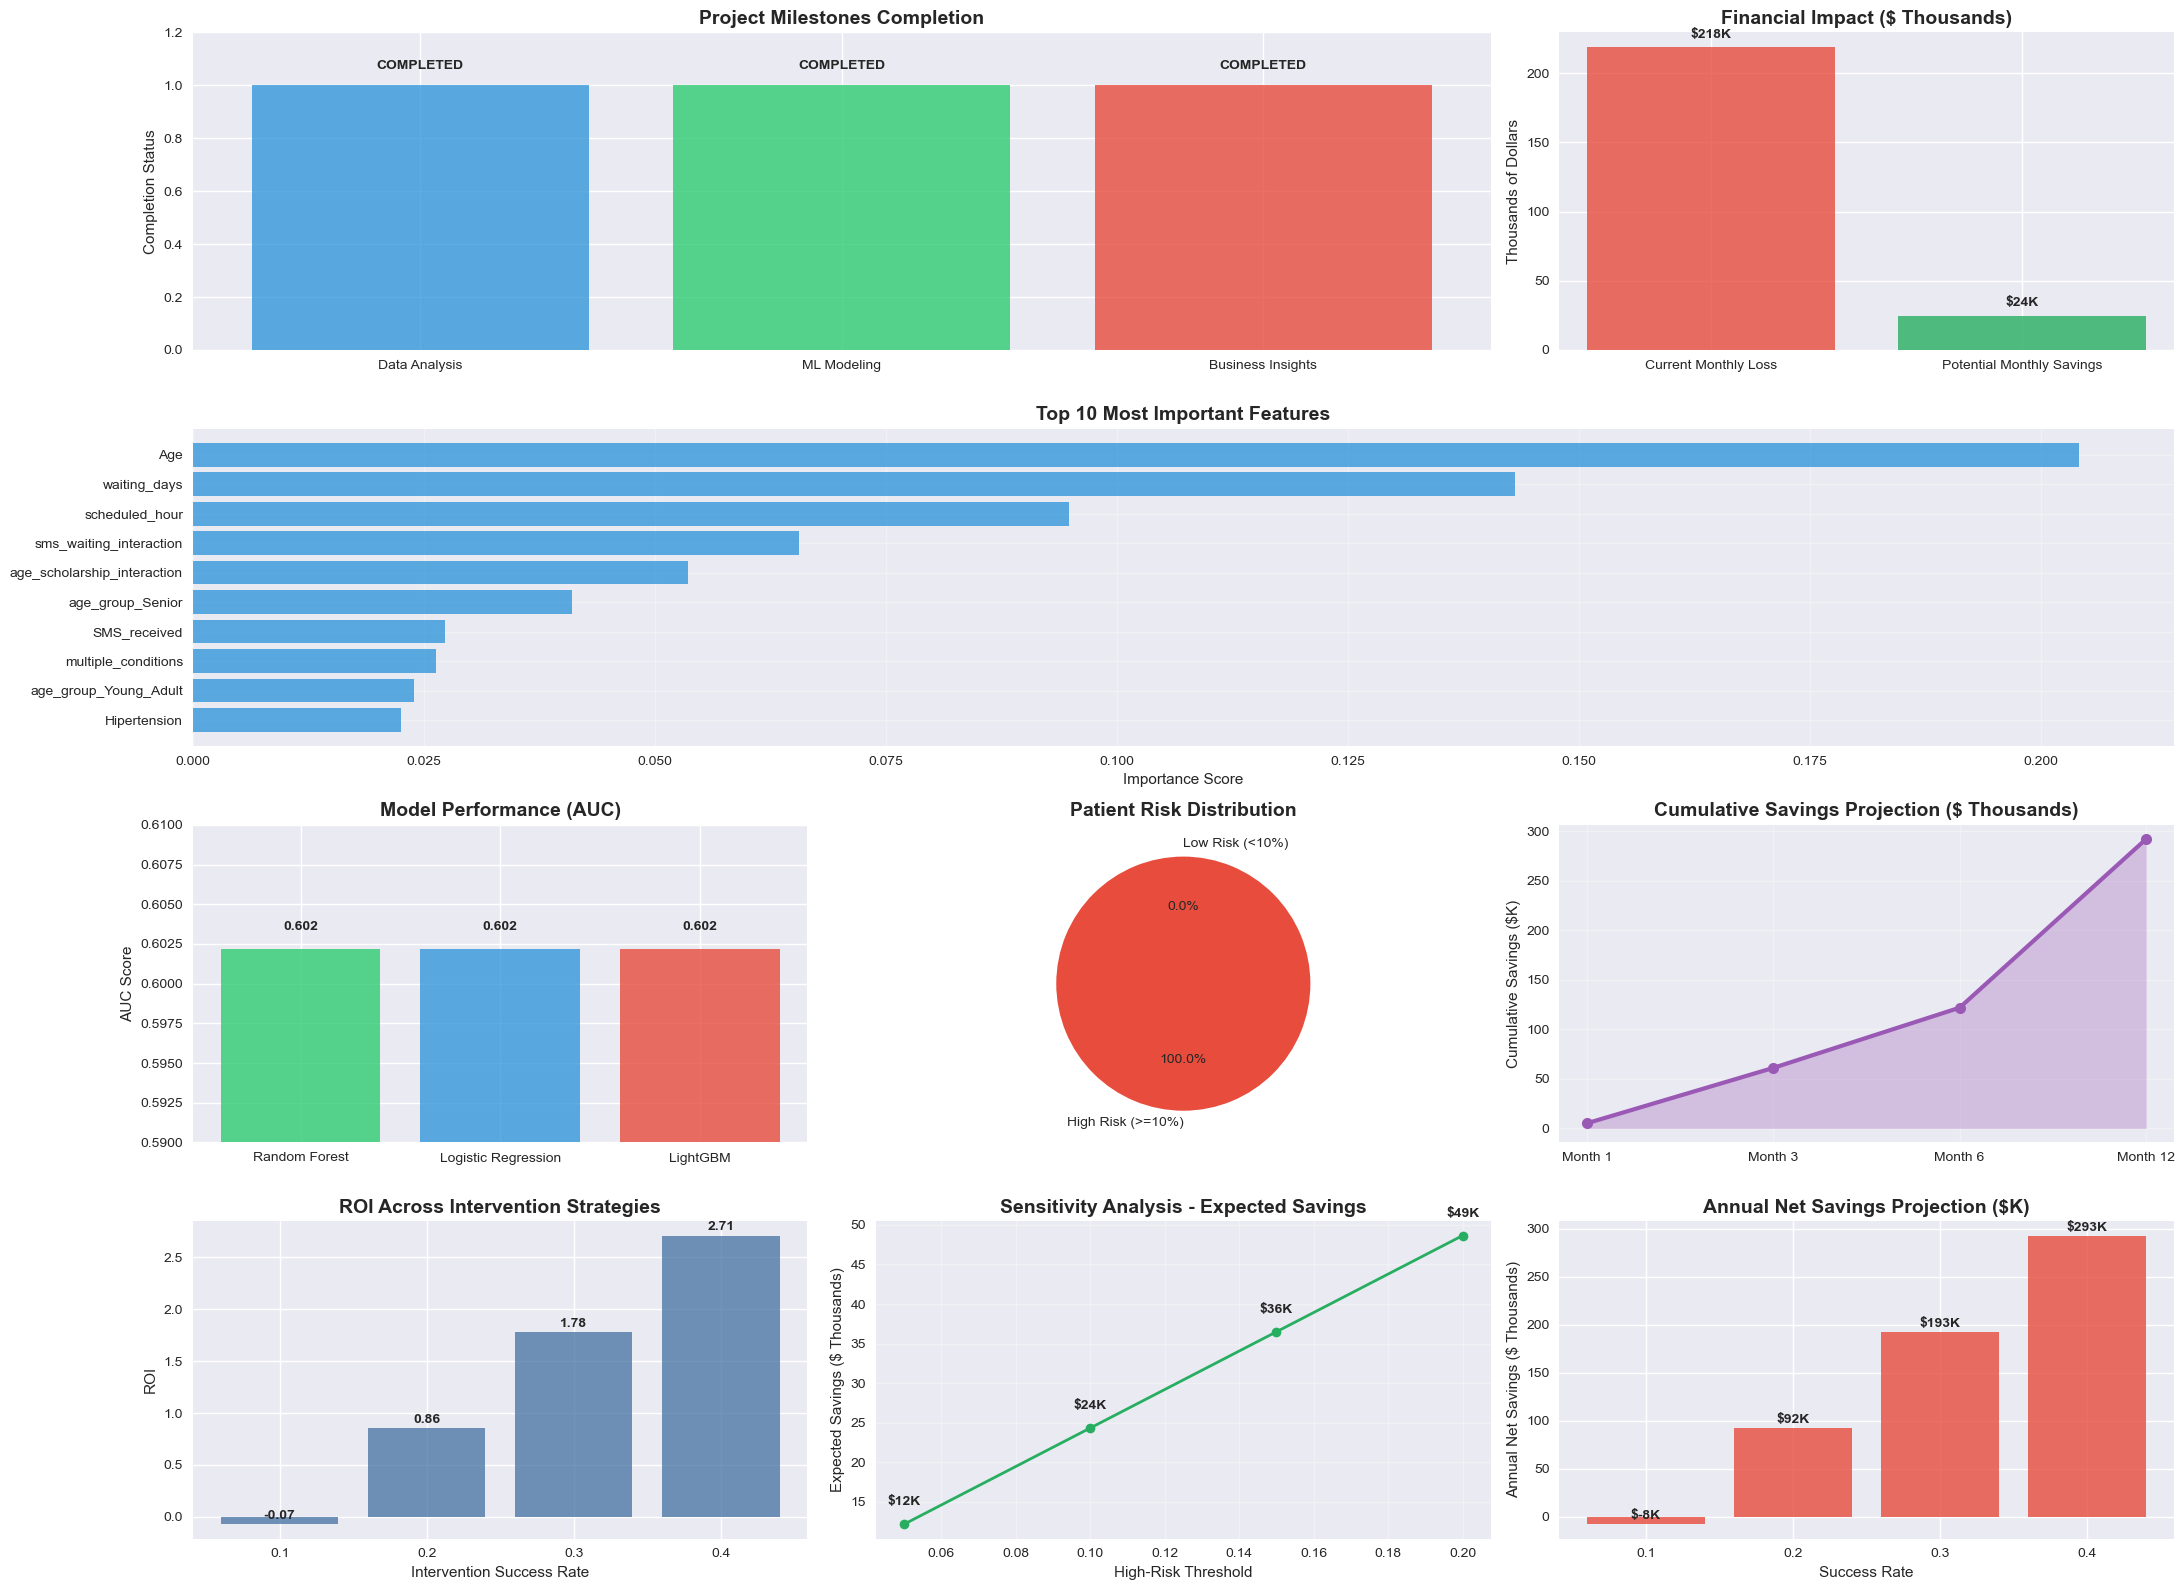

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Set the styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Paths
reports_path = "../reports/"
outputs_path = "../outputs/"
analytics_path = "../analytics/"

# Load outputs from previous steps
executive_summary = pd.read_csv(os.path.join(outputs_path, 'executive_summary.csv'))
feature_importance = pd.read_csv(os.path.join(outputs_path, 'feature_importance.csv'))
high_risk_patients = pd.read_csv(os.path.join(outputs_path, 'high_priority_patients.csv'))

# Load Day 5 analytics
roi_df = pd.read_csv(os.path.join(analytics_path, "roi_simulation.csv"))
sensitivity_df = pd.read_csv(os.path.join(analytics_path, "sensitivity_analysis.csv"))
annual_df = pd.read_csv(os.path.join(analytics_path, "annual_impact.csv"))

print(" All outputs loaded successfully")
print(f"Business impact: ${executive_summary['monthly_net_savings'].iloc[0]:,.0f} monthly savings")


# Executive Dashboard

fig = plt.figure(figsize=(22, 16))

# 1. Project Milestones Completion
ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=2)
metrics = ['Data Analysis', 'ML Modeling', 'Business Insights']
completion = [1.0, 1.0, 1.0]
colors = ['#3498db', '#2ecc71', '#e74c3c']
bars = ax1.bar(metrics, completion, color=colors, alpha=0.8)
ax1.set_title('Project Milestones Completion', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 1.2)
for bar, metric in zip(bars, metrics):
    ax1.text(bar.get_x() + bar.get_width()/2, 1.05, 'COMPLETED',
             ha='center', va='bottom', fontweight='bold')
ax1.set_ylabel('Completion Status')

# 2. Business Impact (Current vs Potential Savings)
ax2 = plt.subplot2grid((4, 3), (0, 2))
categories = ['Current Monthly Loss', 'Potential Monthly Savings']
values = [218500/1000, executive_summary['monthly_net_savings'].iloc[0]/1000]
colors = ['#e74c3c', '#27ae60']
bars = ax2.bar(categories, values, color=colors, alpha=0.8)
ax2.set_title('Financial Impact ($ Thousands)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Thousands of Dollars')
for bar, value in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'${value:.0f}K', ha='center', va='bottom', fontweight='bold')

# 3. Top Feature Importance
ax3 = plt.subplot2grid((4, 3), (1, 0), colspan=3)
top_features = feature_importance.head(10)
ax3.barh(range(len(top_features)), top_features['importance'], color='#3498db', alpha=0.8)
ax3.set_yticks(range(len(top_features)))
ax3.set_yticklabels(top_features['feature'])
ax3.set_title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
ax3.set_xlabel('Importance Score')
ax3.invert_yaxis()
ax3.grid(True, alpha=0.3)

# 4. Model Performance Comparison (AUC)
ax4 = plt.subplot2grid((4, 3), (2, 0))
models = ['Random Forest', 'Logistic Regression', 'LightGBM']
auc_scores = [executive_summary['model_auc_score'].iloc[0]] * 3
colors = ['#2ecc71', '#3498db', '#e74c3c']
bars = ax4.bar(models, auc_scores, color=colors, alpha=0.8)
ax4.set_title('Model Performance (AUC)', fontsize=14, fontweight='bold')
ax4.set_ylim(0.59, 0.61)
ax4.set_ylabel('AUC Score')
for bar, score in zip(bars, auc_scores):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Patient Risk Distribution
ax5 = plt.subplot2grid((4, 3), (2, 1))
risk_levels = ['Low Risk (<10%)', 'High Risk (>=10%)']
risk_counts = [3000 - executive_summary['high_risk_patients_identified'].iloc[0],
               executive_summary['high_risk_patients_identified'].iloc[0]]
colors = ['#2ecc71', '#e74c3c']
ax5.pie(risk_counts, labels=risk_levels, autopct='%1.1f%%', colors=colors, startangle=90)
ax5.set_title('Patient Risk Distribution', fontsize=14, fontweight='bold')

# 6. Cumulative Savings Projection
ax6 = plt.subplot2grid((4, 3), (2, 2))
months = ['Month 1', 'Month 3', 'Month 6', 'Month 12']
cumulative_savings = [
    executive_summary['monthly_net_savings'].iloc[0] * 0.2 / 1000,
    executive_summary['monthly_net_savings'].iloc[0] * 2.5 / 1000,
    executive_summary['monthly_net_savings'].iloc[0] * 5 / 1000,
    executive_summary['annual_savings_potential'].iloc[0] / 1000
]
ax6.plot(months, cumulative_savings, marker='o', linewidth=3, markersize=8, color='#9b59b6')
ax6.fill_between(months, cumulative_savings, alpha=0.3, color='#9b59b6')
ax6.set_title('Cumulative Savings Projection ($ Thousands)', fontsize=14, fontweight='bold')
ax6.set_ylabel('Cumulative Savings ($K)')
ax6.grid(True, alpha=0.3)

# 7. ROI Simulation from Day 5
ax7 = plt.subplot2grid((4, 3), (3, 0))
ax7.bar(roi_df["Success Rate"].astype(str), roi_df["ROI"], color="#4E79A7", alpha=0.8)
ax7.set_title("ROI Across Intervention Strategies", fontsize=14, fontweight='bold')
ax7.set_xlabel("Intervention Success Rate")
ax7.set_ylabel("ROI")
for i, roi in enumerate(roi_df["ROI"]):
    ax7.text(i, roi + 0.02, f"{roi:.2f}", ha='center', va='bottom', fontweight='bold')

# 8. Sensitivity Analysis on Thresholds
ax8 = plt.subplot2grid((4, 3), (3, 1))
ax8.plot(sensitivity_df["Threshold"], sensitivity_df["Expected Savings"]/1000, marker='o', color='#27ae60', linewidth=2)
ax8.set_title("Sensitivity Analysis - Expected Savings", fontsize=14, fontweight='bold')
ax8.set_xlabel("High-Risk Threshold")
ax8.set_ylabel("Expected Savings ($ Thousands)")
ax8.grid(True, alpha=0.3)
for x, y in zip(sensitivity_df["Threshold"], sensitivity_df["Expected Savings"]/1000):
    ax8.text(x, y + 2, f"${y:.0f}K", ha='center', va='bottom', fontweight='bold')

# 9. Annual Impact Projection
ax9 = plt.subplot2grid((4, 3), (3, 2))
ax9.bar(annual_df["Success Rate"].astype(str), annual_df["Annual Net Savings"]/1000, color="#e74c3c", alpha=0.8)
ax9.set_title("Annual Net Savings Projection ($K)", fontsize=14, fontweight='bold')
ax9.set_xlabel("Success Rate")
ax9.set_ylabel("Annual Net Savings ($ Thousands)")
for i, value in enumerate(annual_df["Annual Net Savings"]/1000):
    ax9.text(i, value + 2, f"${value:.0f}K", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(reports_path, 'executive_dashboard_updated.png'), dpi=300, bbox_inches='tight')
plt.show()


# Portfolio Summary

portfolio_summary = f"""
MEDICAL APPOINTMENT NO-SHOW PREDICTION PROJECT
==============================================

PROJECT SUMMARY
---------------
Machine learning solution to predict patient no-shows and identify cost-saving opportunities.

KEY RESULTS
-----------
- Model Performance: {executive_summary['model_auc_score'].iloc[0]:.3f} AUC
- Annual Savings Potential: ${executive_summary['annual_savings_potential'].iloc[0]:,.0f}
- High-Risk Patients Identified: {executive_summary['high_risk_patients_identified'].iloc[0]:,} monthly
- Targeting Accuracy: {executive_summary['targeting_accuracy'].iloc[0]:.1%}
- Return on Investment: {executive_summary['return_on_investment'].iloc[0]:.1f}x
- Optimal Threshold: 10% probability

TECHNICAL APPROACH
------------------
- Data: 100,000+ medical appointments
- Features: 34 engineered features
- Models: Random Forest, Logistic Regression, LightGBM

KEY INSIGHTS
------------
- Top Predictors: {feature_importance.iloc[0]['feature']}, {feature_importance.iloc[1]['feature']}
- Monthly Net Savings: ${executive_summary['monthly_net_savings'].iloc[0]:,.0f}
- ROI and Sensitivity Analysis included
"""

# Save portfolio summary
with open(os.path.join(reports_path, 'portfolio_summary_updated.txt'), 'w') as f:
    f.write(portfolio_summary)
